3.  Using  Bandreject  Filtering  for  Image  Denoising.  Image  FigP0405 
(HeadCT_corrupted).tif is a tomography image of a human head, heavily corrupted by 
sinusoidal noise in at least two directions. 
a.  Clean up the image using bandreject filtering.  To simplify your project you may 
ignore padding in this case.  Hint: Since the noise is sinusoidal, it will show in 
the spectrum as impulses.  Display the spectrum as a guide to where to set up 
the  band  of  your  filter.  If  you  use  function  impixelinfo  to  determine  the 
coordinates of the impulses interactively, keep in mind that this function lists 
the column coordinates (v) first and the row coordinates (u) second. 
b.  Use bandpass filtering to extract the noise pattern.

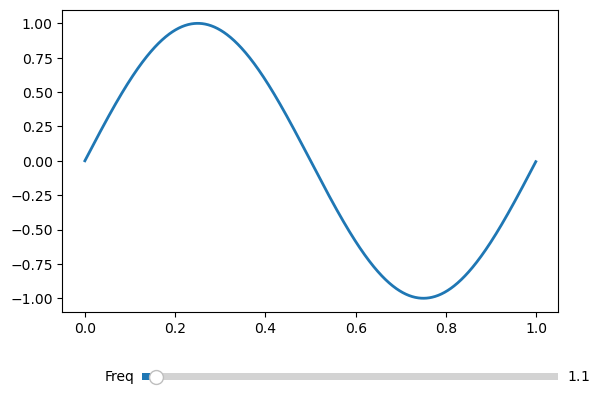

In [ ]:
# Example for widget slider
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

amp = 1
freq = 1

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
s = amp * np.sin(2*np.pi*freq*t)
l, = plt.plot(t, s, lw=2)

ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Freq', 0.1, 30.0, valinit=freq, valstep=1)

def update(val):
    freq = slider.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the TIF image
img = cv2.imread(r'D:\drive\OneDrive - Case Western Reserve University\FILE\2025spring\EBME461 Image\GroupProject\HW05\HW05_EBMECSDS_361461_Images\FigP0405(HeadCT_corrupted).tif', 0)  # 0 for grayscale


In [3]:
# Compute the 2D FFT
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

In [5]:
%matplotlib notebook  

In [6]:
# Create subplots
plt.figure(figsize=(12, 6))

# Display original spatial domain image
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Spatial Domain')
plt.axis('off')

# Display frequency domain image
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain')
plt.axis('off')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

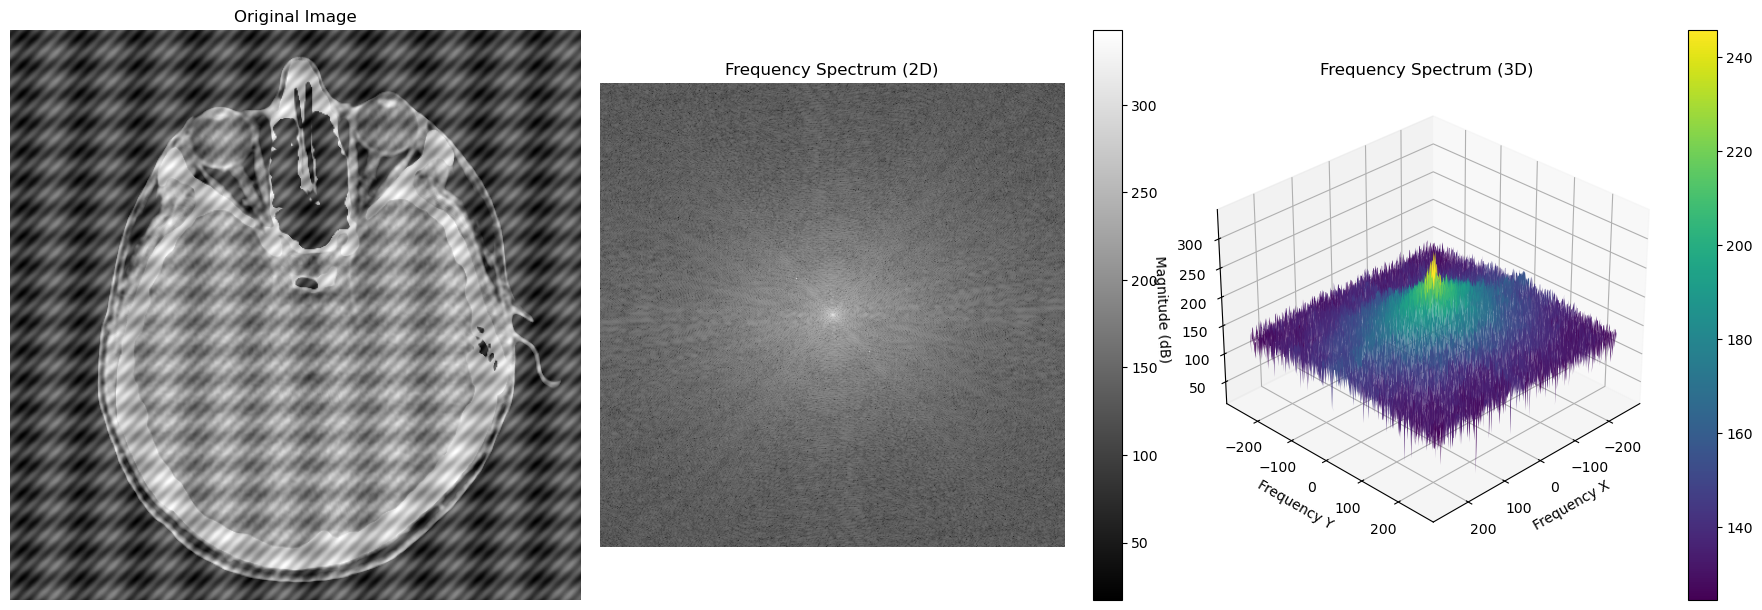

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Create figure with three subplots
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 2D frequency spectrum
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Spectrum (2D)')
plt.colorbar()
plt.axis('off')

# 3D frequency spectrum
ax = plt.subplot(133, projection='3d')

# Create centered coordinate grid
rows, cols = img.shape
x = np.linspace(-cols//2, cols//2, cols)
y = np.linspace(-rows//2, rows//2, rows)
X, Y = np.meshgrid(x, y)

# Plot 3D surface
surf = ax.plot_surface(X, Y, magnitude_spectrum, cmap='viridis')
plt.colorbar(surf)

ax.set_title('Frequency Spectrum (3D)')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Magnitude (dB)')

# Adjust 3D view
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib notebook  

In [25]:
from matplotlib import interactive
interactive(True)

In [26]:


# Display the spectrum
plt.figure(figsize=(8, 8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.colorbar()

# When you hover over the image, coordinates will show in the toolbar
plt.show()

<IPython.core.display.Javascript object>

In [27]:

# Create figure with three subplots
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 2D frequency spectrum
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Spectrum (2D)')
plt.colorbar()
plt.axis('off')

# 3D frequency spectrum
ax = plt.subplot(133, projection='3d')

# Create centered coordinate grid
rows, cols = img.shape
x = np.linspace(-cols//2, cols//2, cols)
y = np.linspace(-rows//2, rows//2, rows)
X, Y = np.meshgrid(x, y)

# Plot 3D surface
surf = ax.plot_surface(X, Y, magnitude_spectrum, cmap='viridis')
plt.colorbar(surf)

ax.set_title('Frequency Spectrum (3D)')
ax.set_xlabel('Frequency X')
ax.set_ylabel('Frequency Y')
ax.set_zlabel('Magnitude (dB)')

# Adjust 3D view
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

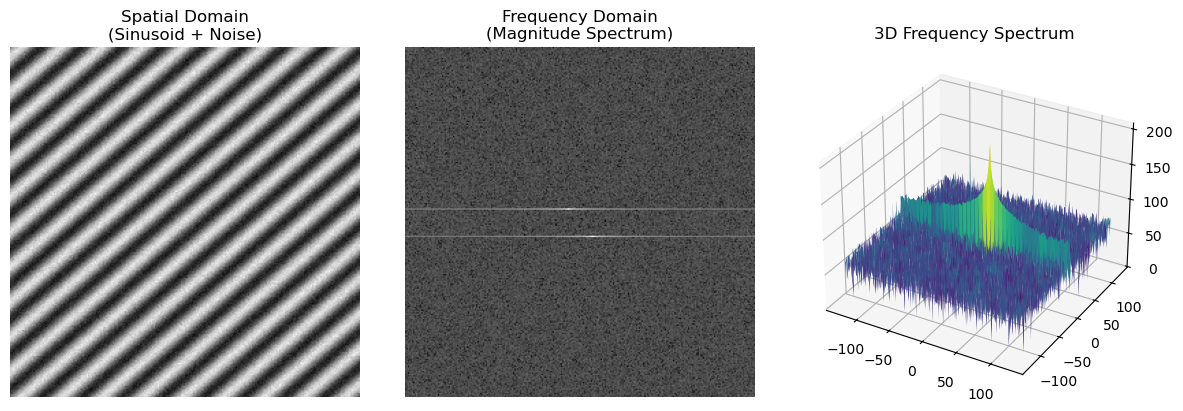

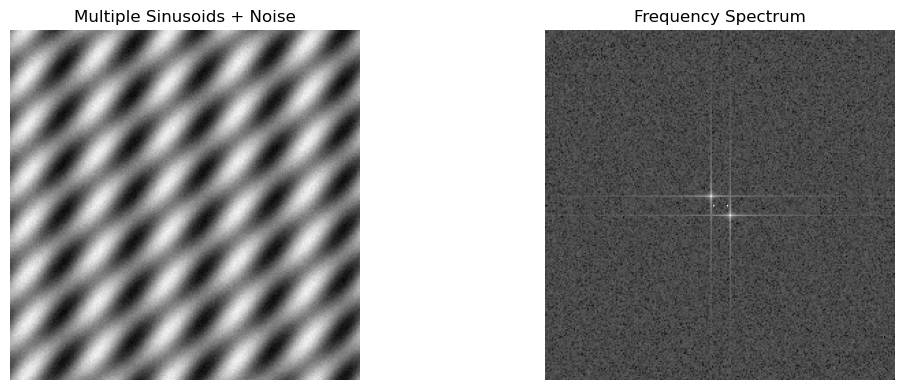

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D sinusoidal pattern
def create_2d_sinusoid(size=256, fx=10, fy=20, theta=30):
    x = np.linspace(0, size-1, size)
    y = np.linspace(0, size-1, size)
    X, Y = np.meshgrid(x, y)
    
    # Convert angle to radians
    theta_rad = np.deg2rad(theta)
    
    # Create rotated sinusoidal pattern
    sinusoid = np.sin(2*np.pi*(fx*X*np.cos(theta_rad) + fy*Y*np.sin(theta_rad))/size)
    return sinusoid

# Create image with sinusoidal pattern
size = 256
img = create_2d_sinusoid(size, fx=10, fy=20, theta=30)

# Add some noise (optional)
noisy_img = img + 0.1 * np.random.randn(size, size)

# Compute 2D FFT
f_transform = np.fft.fft2(noisy_img)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)

# Create visualization
plt.figure(figsize=(12, 4))

# Original spatial domain image
plt.subplot(131)
plt.imshow(noisy_img, cmap='gray')
plt.title('Spatial Domain\n(Sinusoid + Noise)')
plt.axis('off')

# Frequency domain (magnitude spectrum)
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Domain\n(Magnitude Spectrum)')
plt.axis('off')

# 3D surface plot of the magnitude spectrum
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(133, projection='3d')
X, Y = np.meshgrid(np.arange(-size//2, size//2), np.arange(-size//2, size//2))
ax.plot_surface(X, Y, magnitude_spectrum, cmap='viridis')
plt.title('3D Frequency Spectrum')

plt.tight_layout()
plt.show()

# Example with multiple sinusoidal components
def create_multiple_sinusoids(size=256):
    img1 = create_2d_sinusoid(size, fx=5, fy=5, theta=0)    # Horizontal pattern
    img2 = create_2d_sinusoid(size, fx=10, fy=10, theta=45) # Diagonal pattern
    combined = img1 + img2
    return combined

# Create and visualize multiple patterns
multi_img = create_multiple_sinusoids(size)
noisy_multi = multi_img + 0.1 * np.random.randn(size, size)

# Compute spectrum
f_transform_multi = np.fft.fft2(noisy_multi)
f_shift_multi = np.fft.fftshift(f_transform_multi)
magnitude_spectrum_multi = 20 * np.log(np.abs(f_shift_multi) + 1)

# Visualize
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.imshow(noisy_multi, cmap='gray')
plt.title('Multiple Sinusoids + Noise')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum_multi, cmap='gray')
plt.title('Frequency Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()